In [306]:



%matplotlib notebook

In [307]:
#dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy.stats import linregress

In [308]:
#set path to data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [309]:
#read the mouse data file and display first 5 rows
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [310]:
#read the study results data file and display the first 5 rows
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [311]:
#combine the datasets into one dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [312]:
#get the number of mice
mouse_count = mouse_study_results["Mouse ID"].value_counts()
mouse_count_total = len(mouse_count)
mouse_count_total

249

In [313]:
#get the duplicate mice by ID number and timepoint
duplicates = mouse_study_results.loc[mouse_study_results.duplicated(['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [314]:
#optional: get all the data for the duplicate mouse ID
all_duplicates = mouse_study_results.loc[mouse_study_results['Mouse ID'] == 'g989']
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [315]:
#create a clean DataFrame by dropping the duplicate mouse by its ID
all_duplicates = mouse_study_results.loc[mouse_study_results['Mouse ID'] == 'g989']
cleaned_mouse_study_results = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicates)==False]
cleaned_mouse_study_results                                                 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [316]:
#checking the number of mouse in the new clean DataFrame
# cleaned_mouse_count = cleaned_mouse_study_results['Mouse ID'].unique()
# cleaned_mouse_count_total = len(cleaned_mouse_count)
# cleaned_mouse_count_total
cleaned_mouse_count2=len(cleaned_mouse_study_results['Mouse ID'].unique())
cleaned_mouse_count2

248

In [317]:
#Generate a summary statistics table of mean, median, variance, standard deviation and SEM of the
#tumor volume for each regimen

mean_of_regimen = cleaned_mouse_study_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mean_of_regimen

median_of_regimen = cleaned_mouse_study_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
median_of_regimen

variance_of_regimen = cleaned_mouse_study_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
variance_of_regimen

std_of_regimen = cleaned_mouse_study_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
std_of_regimen

sem_of_regimen =cleaned_mouse_study_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
sem_of_regimen


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [318]:
#summary statistics table
summary_stats_table = pd.DataFrame({"Mean": mean_of_regimen, "Median": median_of_regimen, "Variance":
                                    variance_of_regimen, "Standard Deviation": std_of_regimen, "SEM":
                                    sem_of_regimen})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [319]:
#using the aggregation method, produce the same summary statistics in a single line
single_line_summary = cleaned_mouse_study_results.groupby('Drug Regimen')
summary_stats_table_single = single_line_summary.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stats_table_single

/var/folders/94/fq2hpsy55gb_mpl165kbwpd80000gn/T/ipykernel_5479/186457287.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_table_single = single_line_summary.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [320]:
#Bar and Pie Charts

<IPython.core.display.Javascript object>


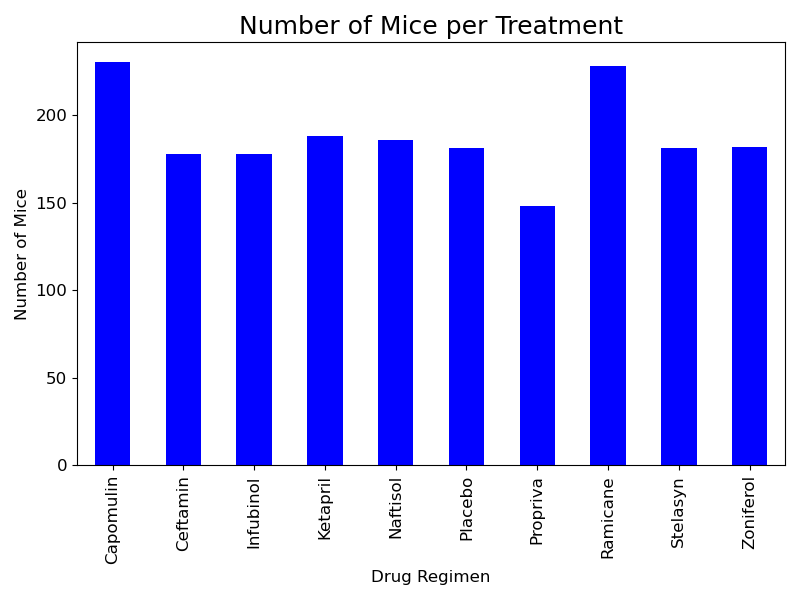

In [321]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas
total_num_per_treat = cleaned_mouse_study_results.groupby(["Drug Regimen"]).count()["Mouse ID"]
pandas_plot = total_num_per_treat.plot.bar(figsize=(8,6), color='b', fontsize = 12)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)
plt.title("Number of Mice per Treatment", fontsize = 18)
plt.tight_layout()
plt.show()

In [322]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

#first get the number of mice that each drug regimen has with an array
num_mice_per_regimen =  (mouse_study_results.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
num_mice_per_regimen

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

<IPython.core.display.Javascript object>


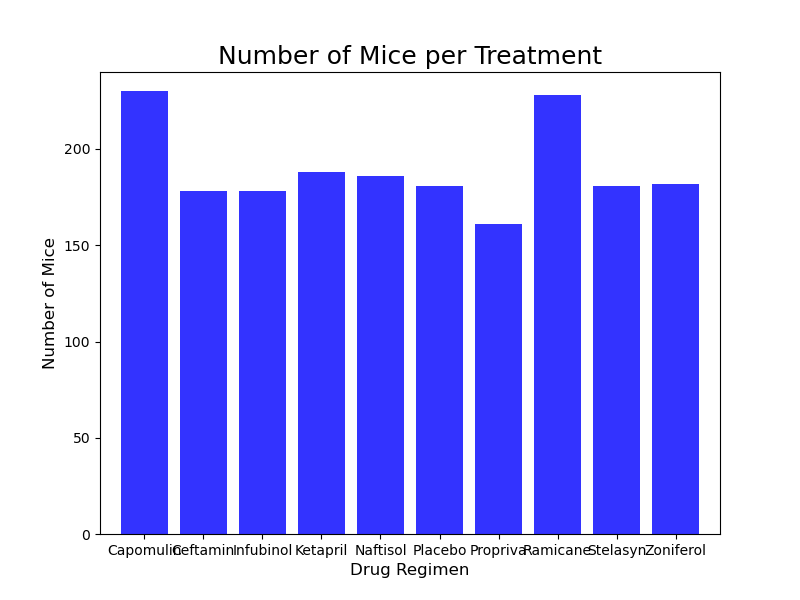

Text(0, 0.5, 'Number of Mice')

In [323]:
#create bar chart
x_axis = np.arange(len(total_num_per_treat))
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.bar(x_axis, num_mice_per_regimen, color='b', alpha=0.8, align='center')

tick_locations =[value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
                            'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(num_mice_per_regimen)+10)

plt.title("Number of Mice per Treatment", fontsize = 18)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Mice", fontsize = 12)

In [324]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

#group by gender and create a DataFrame to plot
groupby_mouse_gender = mouse_study_results.groupby(["Mouse ID", "Sex"])
groupby_mouse_gender
gender_df = pd.DataFrame(groupby_mouse_gender.size())

#create a DataFrame with the total count of male and female mice
total_mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
total_mouse_gender.columns = ["Total Count"]

#create a percentage for female vs male
total_mouse_gender["Percentage of Sex"] = (100*(total_mouse_gender["Total Count"]/total_mouse_gender["Total Count"].sum()))
total_mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<IPython.core.display.Javascript object>


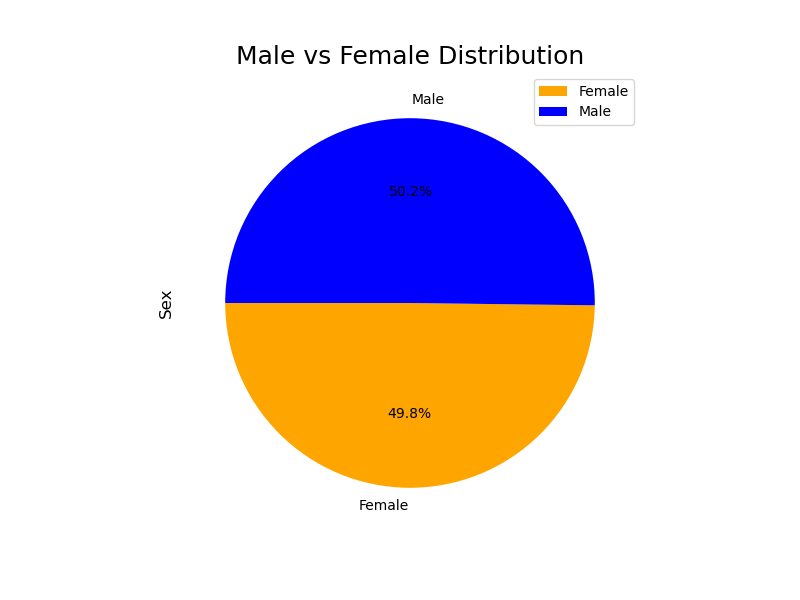

In [325]:
#show pie chart
colors = ['orange', 'blue']
plot = total_mouse_gender.plot.pie(y='Total Count', figsize=(8, 6), colors = colors, startangle=180, autopct='%1.1f%%')
plt.title('Male vs Female Distribution', fontsize = 18)
plt.ylabel('Sex', fontsize = 12)
plt.show()

<IPython.core.display.Javascript object>


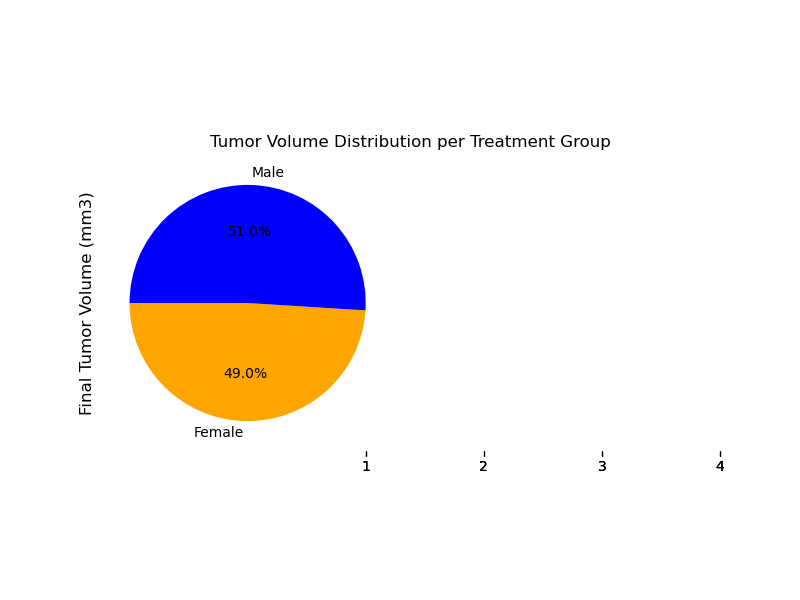

In [326]:
#Generate a pie plot showing the distribution of female versus male using pyplot
labels = ["Female", "Male"]
sizes = [49.0, 51.0]
colors = ['orange', 'blue']

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.pie(sizes, labels = labels, colors = colors, startangle=180, autopct='%1.1f%%')
plt.title('Male vs Female Distribution', fontsize = 18)
plt.ylabel('Sex', fontsize = 12)
plt.show()

In [327]:
#Quartiles, Outliers and Boxplots

In [328]:
#start by getting the last(greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(mouse_study_results.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_Timepoint'} )

#merge max_point onto mouse_study_results
mouse_study_results_final = pd.merge(mouse_study_results, max_timepoint, on='Mouse ID')
mouse_study_results_final.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [342]:
#Calculate the final tumor volume of each mouse across four of the treatment regimen
#Capomulin, Ramicane, Infubinol, Ceftamin

#put treatments into a list for for loop and later for plot labels
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#locate the rows which contain mice on each drug and get any potential outliers
for drug in drug_regimen:
    drug_df = mouse_study_results_final.loc[mouse_study_results_final["Drug Regimen"] == drug]
    
    #add subset
    final_mouse_study_results = drug_df.loc[drug_df['Timepoint'] == drug_df['Max_Timepoint']]
    #get the tumor vol data and add to the empty list
    vol = final_mouse_study_results['Tumor Volume (mm3)']
    tumor_vol_data.append(vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    print(f'IQR for {drug}: {IQR}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    
    #check for outliers
    outliers_count = (vol.loc[(final_mouse_study_results['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_mouse_study_results['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


<IPython.core.display.Javascript object>


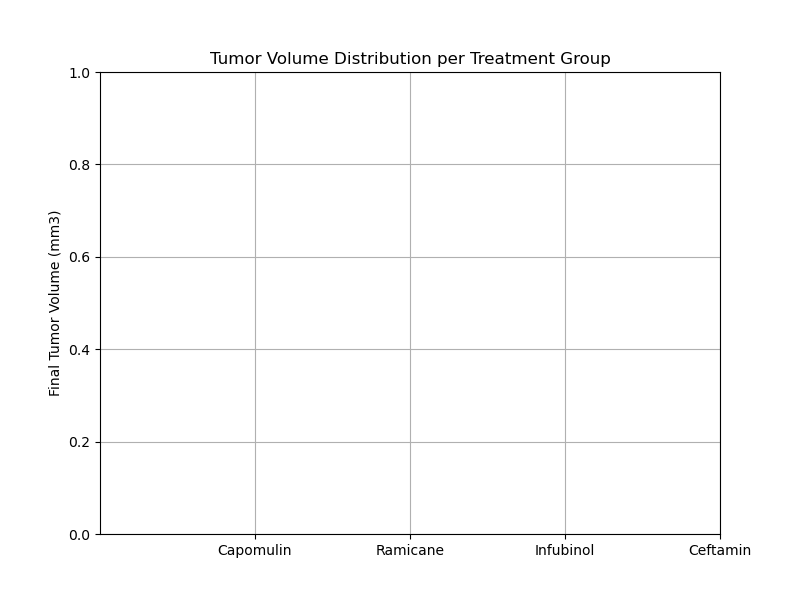

In [343]:
#make the outliers more visible
outliers = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol_data, flierprops=flierprops)

# Add title and labels to boxplot
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.title('Tumor Volume Distribution per Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.grid()
plt.show() #can't get the plot to show

In [300]:
#Line and Scatter Plots

In [301]:
#Generate a line plot of tumor volume vs timepoint for a mouse treated with Capomulin
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


<IPython.core.display.Javascript object>


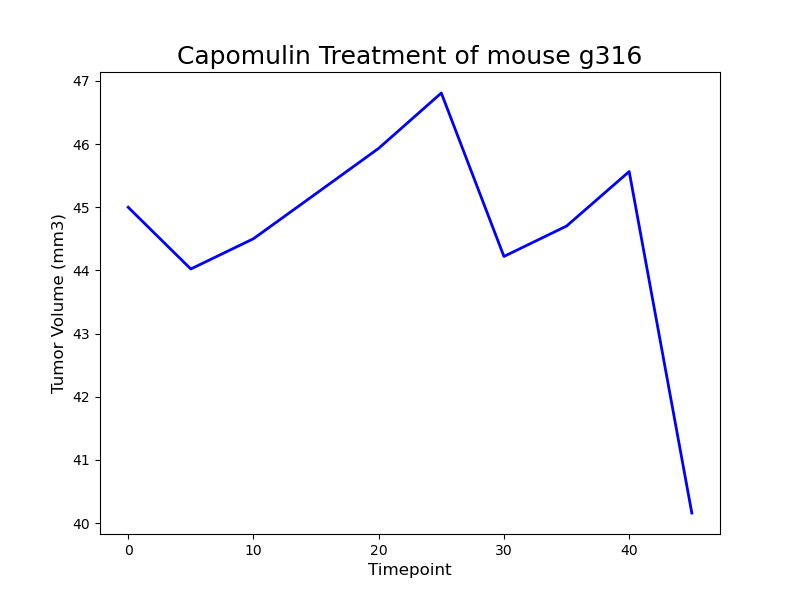

In [302]:
#line plot
x_axis = mouse_df["Timepoint"]
vol = mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.title('Capomulin Treatment of mouse g316', fontsize = 18)
plt.xlabel('Timepoint', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.plot(x_axis, vol, linewidth=2, color="blue")
plt.show()

<IPython.core.display.Javascript object>


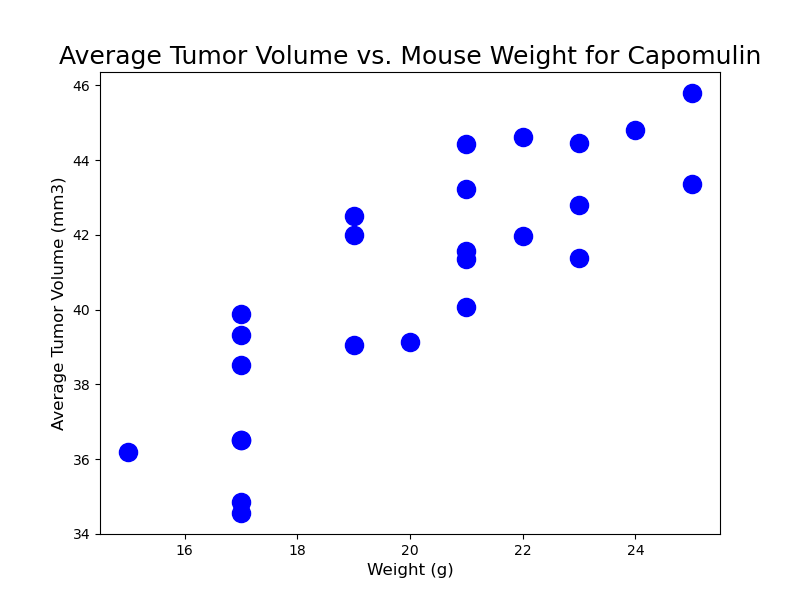

<function matplotlib.pyplot.show(block=None)>

In [303]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(8, 6))
avg_capm_tumvol_weight = Capomulin_df.groupby(['Mouse ID']).mean()

plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin', fontsize = 18)
plt.xlabel('Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 12)
marker_size=12
plt.scatter(avg_capm_tumvol_weight['Weight (g)'], avg_capm_tumvol_weight['Tumor Volume (mm3)'], s=170, color="blue")
plt.show

In [304]:
#calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the capomulin regimen
correlation = round(st.pearsonr(avg_capm_tumvol_weight['Weight (g)'], avg_capm_tumvol_weight['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


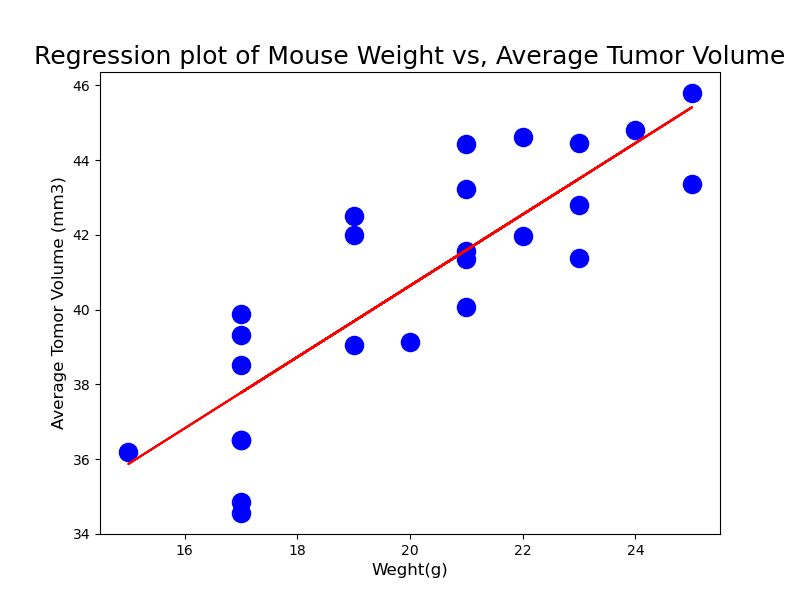

In [305]:
x_values = avg_capm_tumvol_weight['Weight (g)']
y_values = avg_capm_tumvol_weight['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values,s=170, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression plot of Mouse Weight vs, Average Tumor Volume', fontsize = 18)
plt.xlabel('Weght(g)', fontsize = 12)
plt.ylabel('Average Tomor Volume (mm3)', fontsize = 12)

plt.show()